# Building 3D Simulation Functions

In [1]:
import sys
sys.path.append('/home/jhrag/Code/')

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
from NI_simulation.modules import ni_sim3D

%load_ext autoreload
%autoreload 2

In [23]:
source_distribution = ni_sim3D.source_distribution()
sources = source_distribution.surface_line(npts=1000)

test


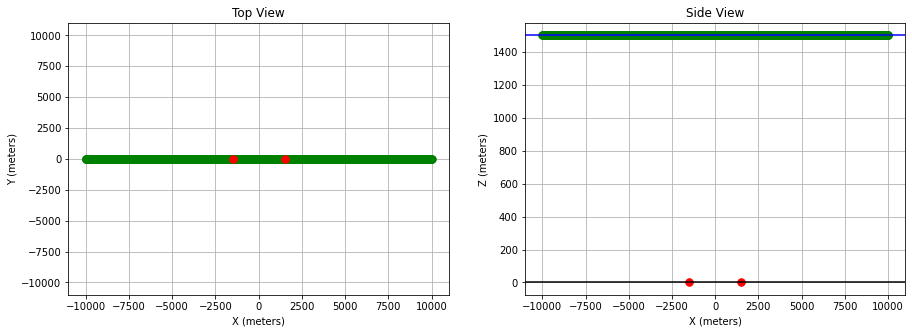

In [27]:
env = ni_sim3D.environment(sources, time_length=5*3600)

env.plot_env( xlim=(-11000,11000), ylim=(-11000,11000), type='both')

In [28]:
xA, xB = env.get_signals()

array([ 7.70988212e-24,  7.70988212e-23, -5.39691748e-23, ...,
       -3.08395285e-23,  0.00000000e+00,  3.08395285e-23])

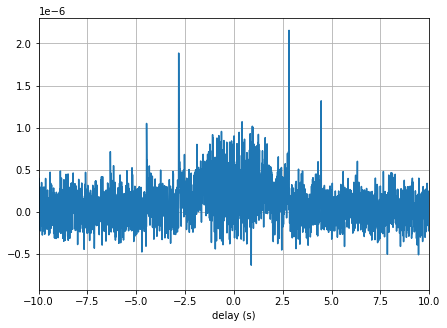

In [29]:
env.correlate(plot=True)

## Create Animation

In [3]:
# create x points to simuled
xs = list(np.linspace(-15000, 15000, 100))

In [4]:
for k, x in enumerate(tqdm(xs)):
    source_distribution = ni_sim3D.source_distribution()
    sources = source_distribution.surface_line_incoherent(xmin=x-1000, xmax=x+1000, npts=32, label='fin_incoherent', hydrophone='A')
    sources = source_distribution.surface_line_incoherent(xmin=5000, xmax=7000, npts=32, label = 'fin_incoherent', hydrophone='B')

    env = ni_sim3D.environment(sources, time_length=600)

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    env.plot_env(xlim=(-16000,16000), type='side', ax=ax1)
    env.get_signals()
    env.correlate(plot=True, ax=ax2)
    #ax2.set_ylim([-3e-10, 3e-10])

    fig.savefig(f'animation_figures/{k:04}.png', dpi=400)
    plt.close()

print('Writing animation to file...')
im_name = 'fin_whale_incoherent.mp4'
os.system(f'ffmpeg -r 40 -f image2 -s 1920x1080 -i animation_figures/%04d.png -vcodec libx264 -crf 15 -pix_fmt yuv420p {im_name}')



100%|██████████| 100/100 [06:12<00:00,  3.72s/it]
Writing animation to file...


0

In [2]:
im_name = 'fin_whale_incoherent.mp4'
os.system(f'ffmpeg -r 40 -f image2 -s 1920x1080 -i animation_figures/%04d.png -vcodec libx264 -crf 15 -pix_fmt yuv420p {im_name}')

0

## Add Fin Whales

In [4]:
source_distribution = ni_sim3D.source_distribution()
sources = source_distribution.surface_line(xmin=(-10000-1000), xmax=(-10000+1000), npts=20, label='fin_model')

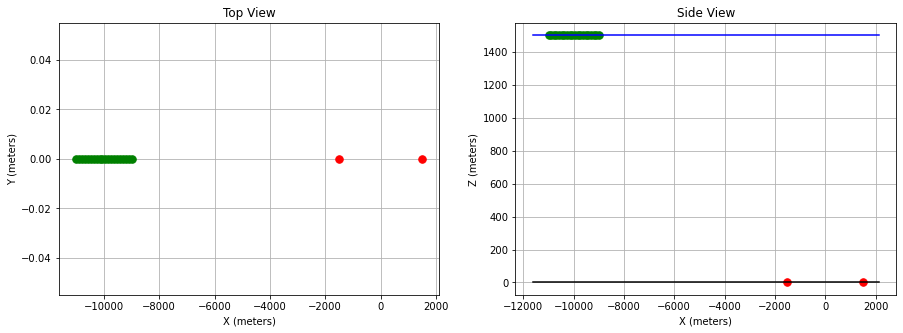

In [22]:
env = ni_sim3D.environment(sources)
env.plot_env()
_ = env.get_signals()

array([ 4.52364397e-29,  1.29246971e-29,  6.46234854e-30, ...,
       -8.61646471e-30, -8.61646471e-30,  0.00000000e+00])

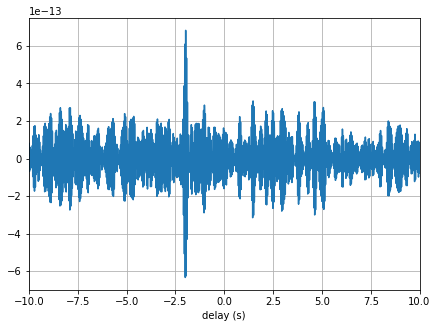

In [23]:
env.correlate(plot=True)

## Incoherent Fin Whales

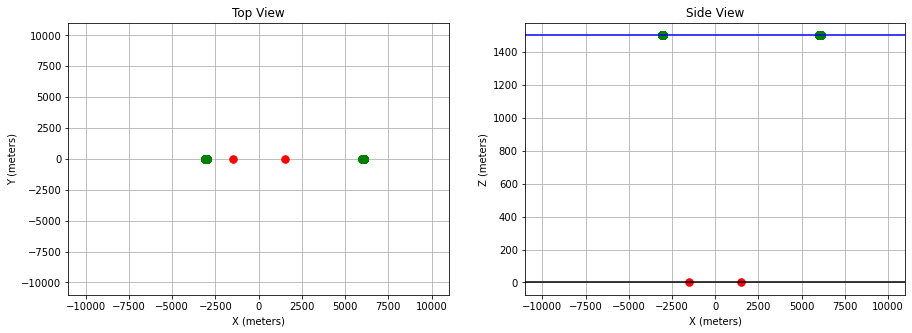

In [30]:
source_distribution = ni_sim3D.source_distribution()
_ = source_distribution.surface_line_incoherent(xmin=-3100, xmax = -3000, npts=100, label='fin_incoherent', hydrophone='A')
sources = source_distribution.surface_line_incoherent(xmin=6000, xmax = 6100, npts=100, label='fin_incoherent', hydrophone='B')

env = ni_sim3D.environment(sources, time_length=5*3600)
env.plot_env( xlim=(-11000,11000), ylim=(-11000,11000), type='both')



In [31]:
_ = env.get_signals()

(-2.5, 2.5)

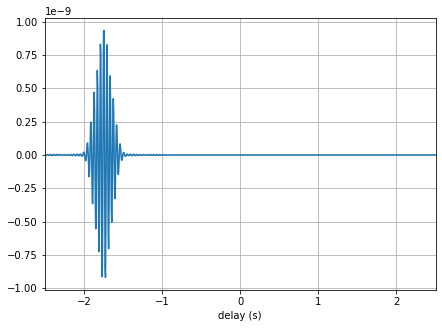

In [32]:
env.correlate(plot=True)
plt.xlim([-2.5,2.5])